# TEST 2 - DATA SCIENCE - REGRESIÓN

Para este ejercicio he utilizado otro dataset público de Kaggle (https://www.kaggle.com/datasets/victorbonilla/beijing-multisite-airquality-data-data-set), que combina múltiples variables ambientales y químicas, permitiendo explorar una relación multivariante, y no es financiero, por lo que cumple las condiciones del ejercicio.

In [2]:
# imports
import numpy as np
import pandas as pd

In [29]:
ruta = "/content/PRSA_Data_Guanyuan_20130301-20170228.csv"
df = pd.read_csv(ruta)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


In [4]:
# Mostrar las primeras filas del conjunto de datos
print(df.head())

# Información del conjunto de datos
print(df.info())

# Estadísticas descriptivas
print(df.describe())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   m

### Descripción de las variables del dataset

| **Variable** | **Descripción** |
|--------------|-----------------|
| `year`       | Año de la observación. |
| `month`      | Mes de la observación (1-12). |
| `day`        | Día del mes correspondiente a la observación. |
| `hour`       | Hora del día en formato 24 horas (0-23). |
| `PM2.5`      | Concentración de partículas finas (menores a 2.5 micras) en el aire (µg/m³). Indicador clave de contaminación. |
| `PM10`       | Concentración de partículas más grandes (menores a 10 micras) en el aire (µg/m³). |
| `SO2`        | Concentración de dióxido de azufre (µg/m³), asociado a emisiones industriales y de combustibles fósiles. |
| `NO2`        | Concentración de dióxido de nitrógeno (µg/m³), relacionado con el tráfico vehicular y emisiones urbanas. |
| `CO`         | Concentración de monóxido de carbono (mg/m³), un gas tóxico derivado de la combustión incompleta. |
| `O3`         | Concentración de ozono a nivel del suelo (µg/m³), un contaminante secundario formado por reacciones químicas en la atmósfera. |
| `TEMP`       | Temperatura ambiental (°C). |
| `PRES`       | Presión atmosférica (hPa). |
| `DEWP`       | Punto de rocío (°C), indica la temperatura a la que el aire debe enfriarse para condensarse. |
| `RAIN`       | Cantidad de precipitación (mm). |
| `wd`         | Dirección del viento, representada como siglas (e.g., NNW, NW). |
| `WSPM`       | Velocidad del viento (m/s). |
| `station`    | Estación de monitoreo donde se tomó la observación (e.g., "Guanyuan"). |


Vamos a utilizar como variable objetivo la PM10 que por lo que vemos en el dataset es un factor clave para el estudio de la contaminación ambiental, así que vamos a valorar primero si cumple no-estacionalidad y poder utilizarla en nuestro estudio.

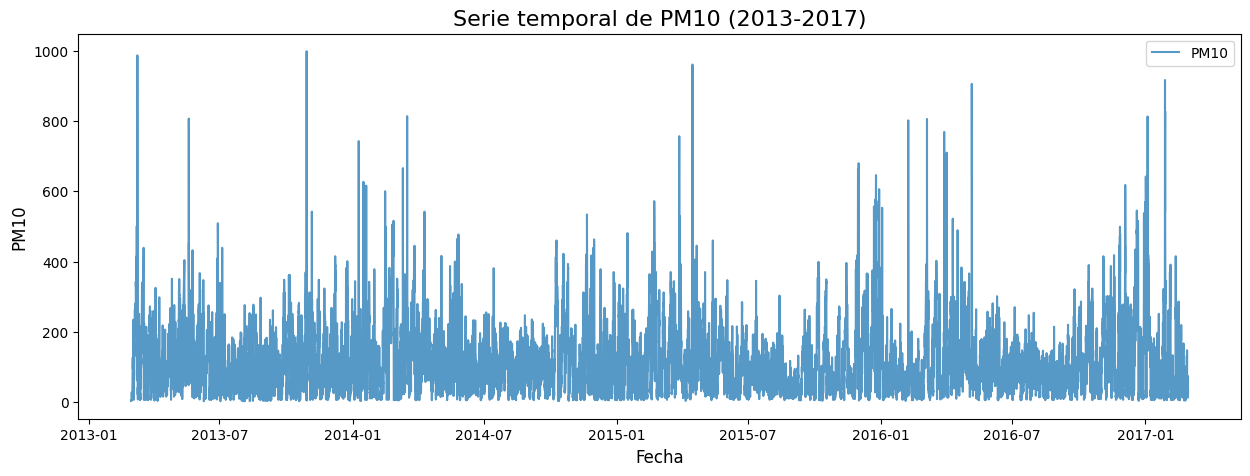

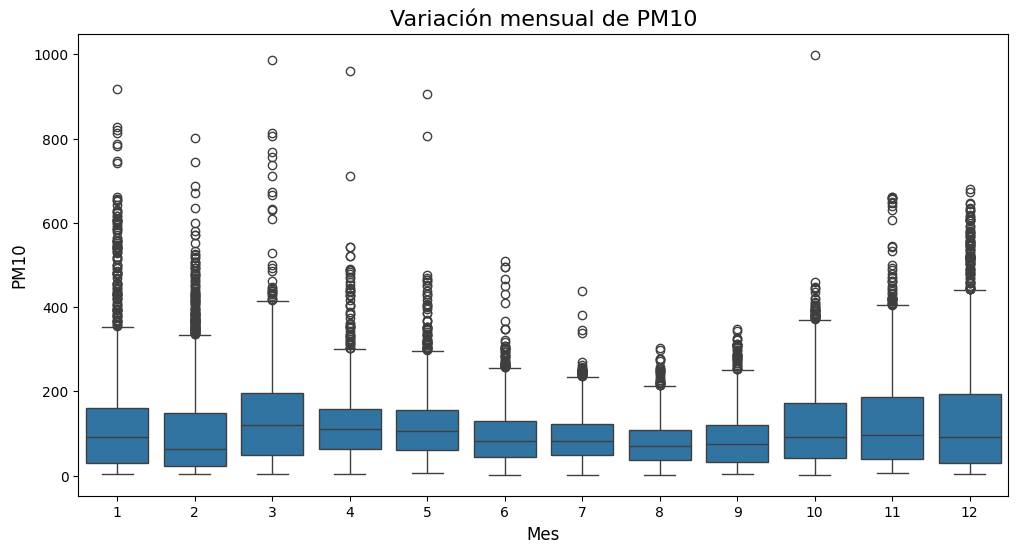

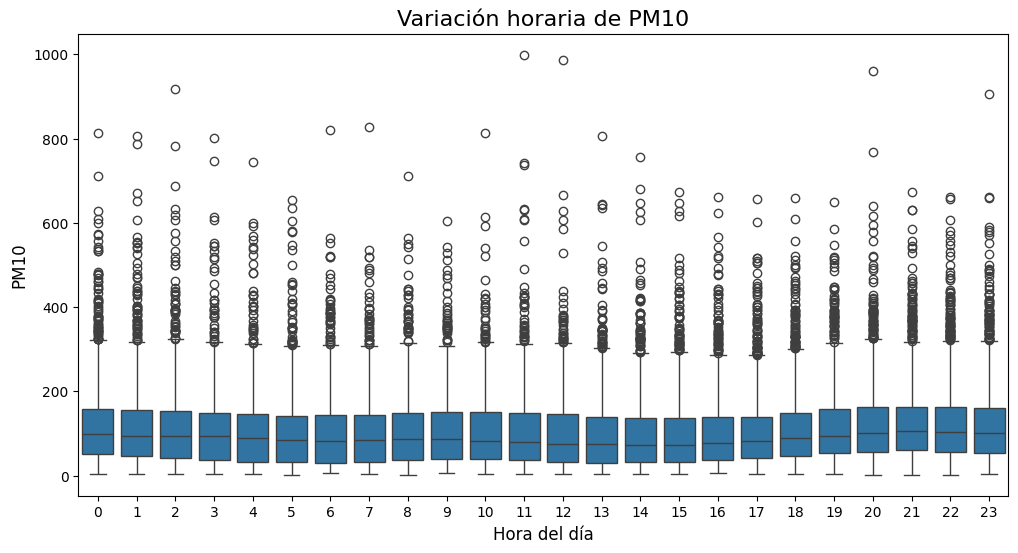

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir columnas de fecha y hora en un único datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Ordenar por datetime
df = df.sort_values(by='datetime')

# Seleccionar la variable PM10
pm10 = df[['datetime', 'PM10']].dropna()

# Estudio gráfico de la serie temporal de PM10
plt.figure(figsize=(15, 5))
plt.plot(pm10['datetime'], pm10['PM10'], label='PM10', alpha=0.75)
plt.title('Serie temporal de PM10 (2013-2017)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('PM10', fontsize=12)
plt.legend()
plt.show()

# Boxplot para observar variaciones por mes
df['month'] = df['datetime'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='PM10', data=df)
plt.title('Variación mensual de PM10', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('PM10', fontsize=12)
plt.show()

# Boxplot para observar variaciones por hora del día
df['hour'] = df['datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='PM10', data=df)
plt.title('Variación horaria de PM10', fontsize=16)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('PM10', fontsize=12)
plt.show()


Vemos que la variable cumple el objetivo de no-estacionalidad, ya que en la segunda gráfica observamos que en el estudio por meses los valores siguen un patrón bastante constante. Sí que es verdad que aunque parece que aumente ligeramente ciertos meses como los de finales de año, no es algo significativo, ya que los picos de contaminación que vemos en la primera gráfica no siguen este patrón, vemos que también hay algún pico residual en mayo de 2014 o en junio de 2016.

Y luego a nivel de horas diarias vemos que aquí los valores si que son constantes y no fluctúan de manera sorprendente a ninguna hora del día en concreto, por lo que deducimos que es una variable que cumple el objetivo del estudio.

## 1. LIMPIEZA DE NULOS

In [30]:
# Convertir columnas de fecha y hora en un único datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Revisar cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con nulos en las columnas relevantes
columns_to_clean = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

df = df.dropna(subset=columns_to_clean)
df = df.dropna(subset=['wd'])

# Verificar que no quedan nulos
print("\nValores nulos restantes:")
print(df.isnull().sum())

# Reiniciar el índice después de limpiar
df = df.reset_index(drop=True)

# Vista previa del dataset limpio
df.head()


Valores nulos por columna:
No             0
year           0
month          0
day            0
hour           0
PM2.5        616
PM10         429
SO2          474
NO2          659
CO          1753
O3          1173
TEMP          20
PRES          20
DEWP          20
RAIN          20
wd            81
WSPM          14
station        0
datetime       0
dtype: int64

Valores nulos restantes:
No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01 04:00:00


# 2. PREPROCESAMIENTO

Eliminamos la columna datetime al estar ya codificada por separado y ser irrelevante.

In [31]:

df = df.drop('datetime', axis=1)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32258,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
32259,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
32260,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
32261,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


La variable wd tiene valores categóricos como "NNW", "N", "NNE", etc. Podríamos utilizar la codificación One-Hot Encoding.

In [32]:
# Mostrar la distribución de la columna 'station'
df['station'].value_counts()


,count
station,
Guanyuan,32263


Eliminamos la columna station al entenderse que todo el estudio es en la misma estación y que no sesgue el modelo.

In [33]:
df = df.drop('station', axis=1)

In [36]:

from sklearn.preprocessing import MinMaxScaler

# Supongamos que tu dataset está cargado en un DataFrame llamado df
# Definir las columnas que deben ser normalizadas (excluyendo las que mencionaste)
columns_to_normalize = [col for col in df.columns if col not in ['No', 'year', 'month', 'day', 'hour', 'PM10', 'wd']]

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas seleccionadas
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Ahora df tiene las variables normalizadas entre 0 y 1, excepto las columnas excluidas
print(df.head())


   No  year  month  day  hour     PM2.5  PM10       SO2       NO2        CO  \
0   1  2013      3    1     0  0.001477   4.0  0.044521  0.067164  0.020202   
1   2  2013      3    1     1  0.001477   4.0  0.041096  0.055970  0.020202   
2   3  2013      3    1     2  0.000000   3.0  0.030822  0.063433  0.020202   
3   4  2013      3    1     3  0.000000   6.0  0.020548  0.082090  0.030303   
4   5  2013      3    1     4  0.000000   6.0  0.013699  0.044776  0.030303   

         O3      TEMP      PRES      DEWP  RAIN   wd      WSPM  
0  0.165835  0.280977  0.661319  0.258621   0.0  NNW  0.392857  
1  0.173067  0.273997  0.664884  0.268025   0.0    N  0.419643  
2  0.165835  0.273997  0.670232  0.268025   0.0  NNW  0.500000  
3  0.148958  0.268761  0.688057  0.249216   0.0   NW  0.276786  
4  0.170656  0.258290  0.700535  0.247649   0.0    N  0.178571  


In [37]:
df.head(1)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,0.001477,4.0,0.044521,0.067164,0.020202,0.165835,0.280977,0.661319,0.258621,0.0,NNW,0.392857
1,2,2013,3,1,1,0.001477,4.0,0.041096,0.055970,0.020202,0.173067,0.273997,0.664884,0.268025,0.0,N,0.419643
2,3,2013,3,1,2,0.000000,3.0,0.030822,0.063433,0.020202,0.165835,0.273997,0.670232,0.268025,0.0,NNW,0.500000
3,4,2013,3,1,3,0.000000,6.0,0.020548,0.082090,0.030303,0.148958,0.268761,0.688057,0.249216,0.0,NW,0.276786
4,5,2013,3,1,4,0.000000,6.0,0.013699,0.044776,0.030303,0.170656,0.258290,0.700535,0.247649,0.0,N,0.178571


Ahora que ya disponemos de unos datos bastante limpios y normalizados podemos pasar al entrenamiento de modelos.

In [38]:
# CHECKPOINT
df.to_csv('PRSA_Data_Guanyuan_20130301-20170228_cleaned_normalized.csv', index=False)

# 3. Modelos de regresión

In [3]:
# CHECKPOINT
ruta = "/content/PRSA_Data_Guanyuan_20130301-20170228_cleaned_normalized.csv"
df = pd.read_csv(ruta)

In [48]:
df.head(100)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,0.001477,4.0,0.044521,0.067164,0.020202,0.165835,0.280977,0.661319,0.258621,0.0,NNW,0.392857
1,2,2013,3,1,1,0.001477,4.0,0.041096,0.055970,0.020202,0.173067,0.273997,0.664884,0.268025,0.0,N,0.419643
2,3,2013,3,1,2,0.000000,3.0,0.030822,0.063433,0.020202,0.165835,0.273997,0.670232,0.268025,0.0,NNW,0.500000
3,4,2013,3,1,3,0.000000,6.0,0.020548,0.082090,0.030303,0.148958,0.268761,0.688057,0.249216,0.0,NW,0.276786
4,5,2013,3,1,4,0.000000,6.0,0.013699,0.044776,0.030303,0.170656,0.258290,0.700535,0.247649,0.0,N,0.178571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,99,2013,3,5,2,0.155096,135.0,0.263699,0.320896,0.131212,0.228517,0.282723,0.508021,0.426332,0.0,S,0.000000
96,100,2013,3,5,3,0.166913,143.0,0.297945,0.305970,0.141414,0.228517,0.296684,0.500891,0.415361,0.0,NE,0.107143
97,101,2013,3,5,4,0.174298,137.0,0.267123,0.328358,0.161616,0.228517,0.324607,0.495544,0.404389,0.0,NE,0.133929
98,102,2013,3,5,5,0.174298,138.0,0.232877,0.354478,0.222121,0.228517,0.303665,0.499109,0.405956,0.0,N,0.071429


En esta primera aproximación, vamos a intentar realizar una primera predicción utilizando un modelo ARIMA para predecir los siguientes 100 instantes de tiempo.

In [49]:
import pandas as pd

# Crear la columna de fecha
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Establecer la columna datetime como el índice
df.set_index('datetime', inplace=True)

# Ahora df tiene un índice temporal y PM10 como columna objetivo


In [50]:
# Seleccionamos solo la columna PM10
y = df['PM10']


In [51]:
# Definir el tamaño del conjunto de entrenamiento (80% de los datos)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]


In [52]:
from statsmodels.tsa.arima.model import ARIMA

# Crear el modelo ARIMA
model = ARIMA(train, order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
# Predecir los próximos 100 pasos (periodos de tiempo)
forecast_steps = 100
forecast = model_fit.forecast(steps=forecast_steps)

# Crear el índice para las predicciones futuras
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps+1, freq='H')[1:]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-53-9bf408fa0045>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps+1, freq='H')[1:]


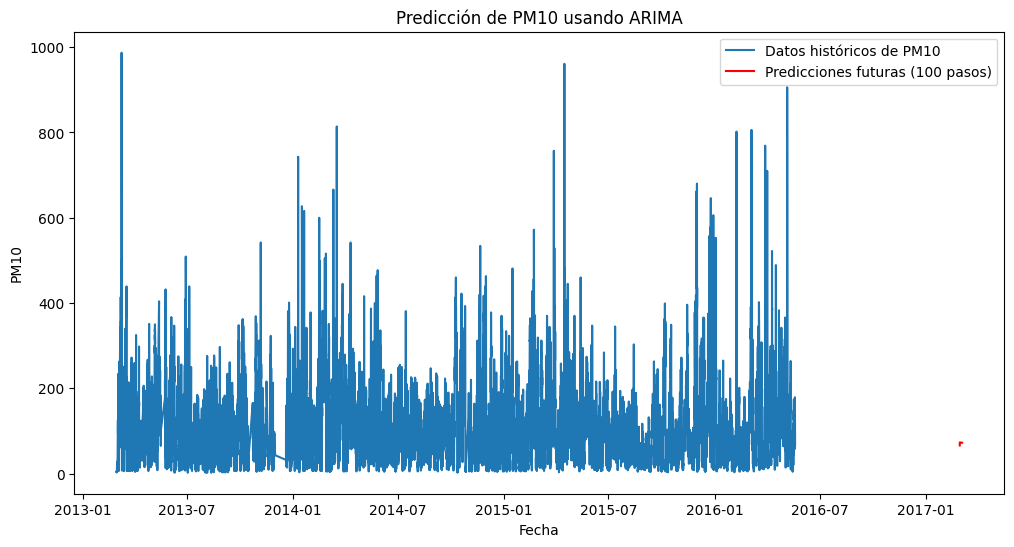

In [54]:
import matplotlib.pyplot as plt

# Visualizar las predicciones
plt.figure(figsize=(12, 6))

# Mostrar la serie temporal real (hasta el final del conjunto de entrenamiento)
plt.plot(train.index, train, label='Datos históricos de PM10')

# Mostrar las predicciones en rojo
plt.plot(forecast_index, forecast, color='red', label='Predicciones futuras (100 pasos)')

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('PM10')
plt.title('Predicción de PM10 usando ARIMA')
plt.show()


In [55]:
from sklearn.metrics import mean_squared_error

# Realizar predicciones sobre el conjunto de prueba
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 10443.252390815884


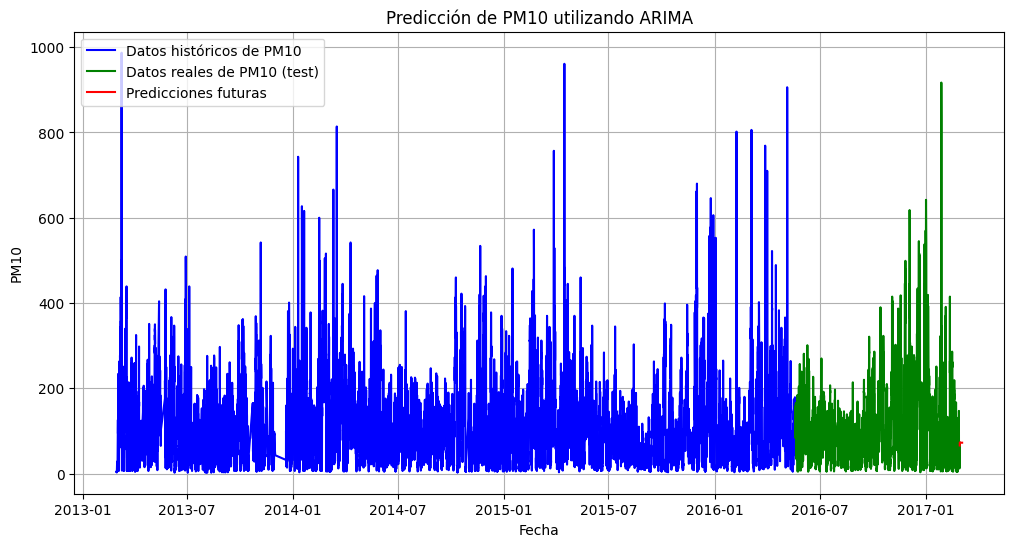

In [56]:
import matplotlib.pyplot as plt

# Suponiendo que 'train' y 'test' son tus datos históricos y las 'forecast' son las predicciones futuras

# Visualizar la serie temporal de PM10 con predicciones
plt.figure(figsize=(12, 6))

# Mostrar la serie temporal real (hasta el final del conjunto de entrenamiento)
plt.plot(train.index, train, label='Datos históricos de PM10', color='blue')

# Mostrar la serie temporal de prueba real
plt.plot(test.index, test, label='Datos reales de PM10 (test)', color='green')

# Mostrar las predicciones en rojo
plt.plot(forecast_index, forecast, color='red', label='Predicciones futuras')

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('PM10')
plt.title('Predicción de PM10 utilizando ARIMA')
plt.grid(True)
plt.show()


Al no conseguir una buena predicción incial hemos obtado por probar un modelo SARIMA.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


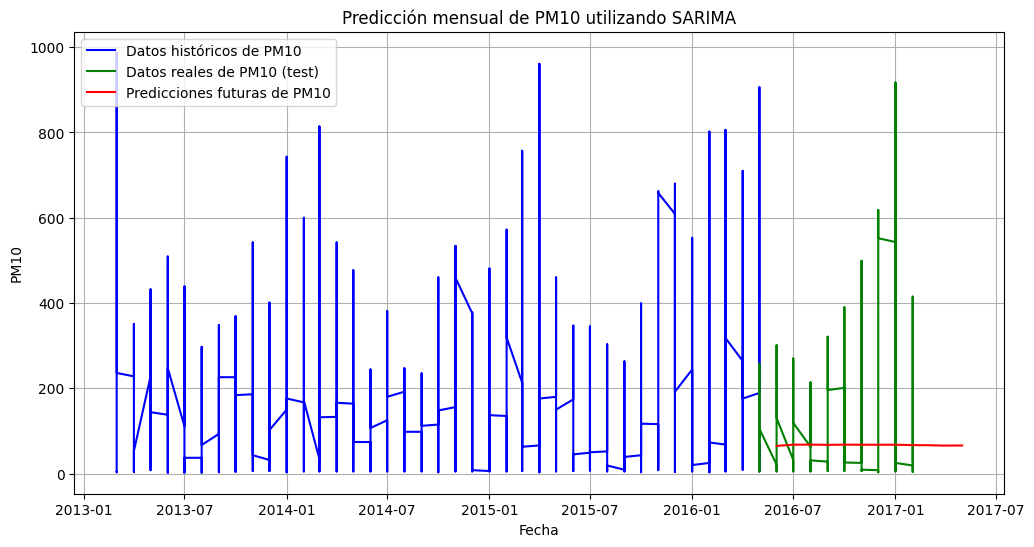

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Crear la columna de fecha completa con year y month
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Establecer la columna 'datetime' como índice
df.set_index('datetime', inplace=True)

# Asegurarse de que los datos estén ordenados cronológicamente
df.sort_index(inplace=True)

# Usar solo la columna de 'PM10' para el modelo
pm10_series = df['PM10']

# Dividir en conjunto de entrenamiento y conjunto de prueba (80% para entrenamiento)
train_size = int(len(pm10_series) * 0.8)
train, test = pm10_series[:train_size], pm10_series[train_size:]

# Ajustar el modelo SARIMA (ajustar parámetros p, d, q, P, D, Q, m según lo necesites)
# Aquí usamos p=1, d=1, q=1 y los parámetros estacionales (P=1, D=1, Q=1, m=12 para mensuales)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Realizar las predicciones para los siguientes 12 meses
forecast_steps = 12  # Predecir los siguientes 12 meses
forecast = model_fit.forecast(steps=forecast_steps)

# Crear el índice de los próximos 12 meses para la predicción
forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# Visualizar la gráfica de la serie temporal
plt.figure(figsize=(12, 6))

# Mostrar los datos históricos (entrenamiento)
plt.plot(train.index, train, label='Datos históricos de PM10', color='blue')

# Mostrar los datos reales (prueba)
plt.plot(test.index, test, label='Datos reales de PM10 (test)', color='green')

# Mostrar las predicciones futuras en rojo
plt.plot(forecast_index, forecast, color='red', label='Predicciones futuras de PM10')

# Configurar la leyenda y las etiquetas
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('PM10')
plt.title('Predicción mensual de PM10 utilizando SARIMA')
plt.grid(True)

# Mostrar el gráfico
plt.show()


Tampoco obtenemos una predicción aproximada ya que aparece una línea totalmente horizontal, por lo que damos otro enfoque con SARIMAX.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


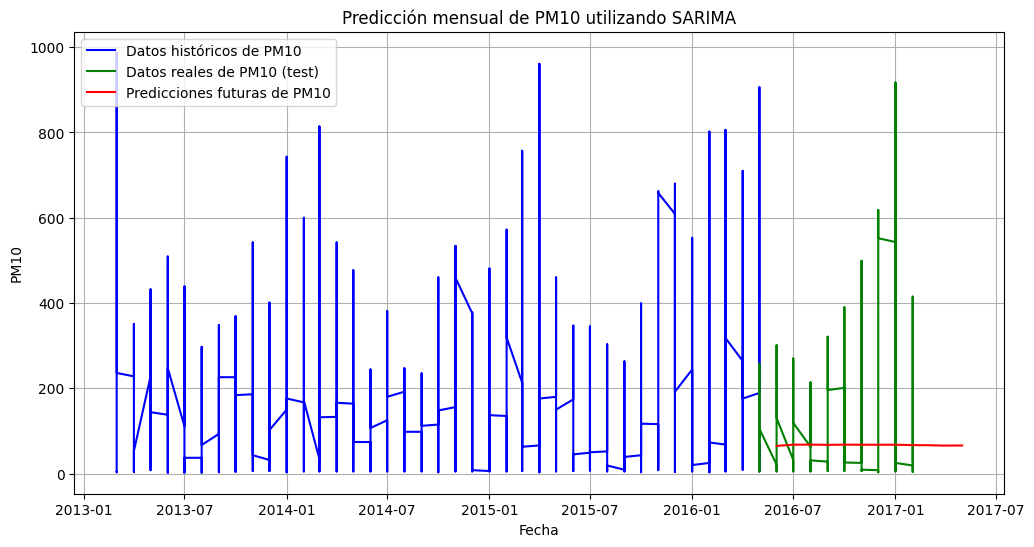

# 4. Conclusiones


Los resultados obtenidos no han sido los esperados. La línea roja de predicción, que representa los valores futuros de PM10, se mostró completamente horizontal, lo que sugiere que el modelo no fue capaz de capturar la dinámica de los datos de manera efectiva. Esto podría deberse a varios factores, como la elección de parámetros inadecuados para el modelo o incluso la naturaleza de los datos de PM10, que podrían requerir un enfoque más complejo para modelar correctamente sus variaciones.



Es importante destacar que esta es la primera vez que trabajo con series temporales, por lo que ha sido un desafío comprender y aplicar los enfoques adecuados. A pesar de los esfuerzos realizados, no se ha logrado una predicción exitosa, lo que resalta la complejidad y los retos asociados con el análisis de series temporales. A pesar de los obstáculos, la experiencia ha sido valiosa para comprender mejor el proceso y las dificultades inherentes a este tipo de modelos.